# Preparation

In [1]:
# This file is based on: 5_presence_of_accident_corr for local environment
# Correlation, Regression, Feature selection
# Random forest classification

In [2]:
import torch
torch.cuda.empty_cache() 

In [3]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
import urllib.request
from PIL import Image

In [4]:
import pandas as pd
import pyproj

In [5]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [6]:
from pathlib import Path
import sklearn
import seaborn as sn
from scipy import stats
from tabulate import tabulate
import statsmodels.api as sm
import statsmodels.tools as tools

In [7]:
from mtp_function_yl import *

In [8]:
# pip install category_encoders

In [9]:
import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import category_encoders as ce
from sklearn import svm
# For regression
from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import PredictionErrorDisplay
import mlxtend
# For stepwise feature selection
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [10]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [11]:
# For documentation and version control
# pip install watermark
%load_ext watermark

In [12]:
%watermark  -u -d -v -m --iversions

Last updated: 2025-01-15

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.29.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
CPU cores   : 12
Architecture: 64bit

sklearn          : 1.5.1
seaborn          : 0.11.2
pyproj           : 3.3.1
shapely          : 1.8.2
cv2              : 4.8.1
torch            : 2.0.1
statsmodels      : 0.14.1
mlxtend          : 0.23.1
numpy            : 1.25.2
category_encoders: 2.6.4
pandas           : 1.3.4
scipy            : 1.11.3
matplotlib       : 3.4.3
PIL              : 8.4.0



# Data Loading and Processing

## Data loading

In [13]:
# For Science Apps
# dfacrpv = pd.read_csv('/home/yelhe/script/mtp/redo_model_input/model_acp_transformed_corr.csv')

# For local environment 
dfacrpv = pd.read_csv('../mtp_jan/model_acp_transformed_corr.csv')

In [14]:
print(dfacrpv.columns)

Index(['Nr', 'cmean', 'cmin', 'csum', 'cmax', 'cp', 'mewmin', 'megmin',
       'iemin', 'mewmax', 'megmax', 'iemax', 'mew', 'meg', 'ie', 'dbusl',
       'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw',
       'dpedcro', 'dstopsign', 'dtrafficarea', 'droad', 'droad_sl', 'dvfpath',
       'gvm_dwv', 'gvm_msp', 'gvm_asp', 'r_width', 'speedlimit',
       'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4',
       'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10',
       'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_15', 'z_qnr_16',
       'z_qnr_17', 'z_qnr_18', 'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22',
       'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28',
       'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_1',
       'z_knr_2', 'z_knr_3', 'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7',
       'z_knr_8', 'z_knr_9', 'z_knr_10', 'z_knr_11', 'trafficarea_1',
       'trafficarea_2', '

## Checking correlation and multicollinearity

In [224]:
cn = ['cmean', 'cmin', 'csum', 'cmax', 'cp', 'mewmin', 'megmin',
       'iemin', 'mewmax', 'megmax', 'iemax', 'mew', 'meg', 'ie', 'dbusl',
       'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw',
       'dpedcro', 'dstopsign', 'dtrafficarea', 'droad', 'droad_sl',
       'gvm_dwv', 'gvm_msp', 'gvm_asp', 'r_width', 'speedlimit',
       'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4',
       'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10',
       'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_15', 'z_qnr_16',
       'z_qnr_17', 'z_qnr_18', 'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22',
       'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28',
       'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_1',
       'z_knr_2', 'z_knr_3', 'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7',
       'z_knr_8', 'z_knr_9', 'z_knr_10', 'z_knr_11', 'trafficarea_1',
       'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4',
       'r_width_5', 'r_width_6', 'speedlimit_1', 'speedlimit_2',
       'speedlimit_3', 'speedlimit_4', 'speedlimit_5', 'speedlimit_6']

# n_th dummy variables, not-good-resource variable were already removed
# Need to remove dvfpath, which is generated from the same data with qseudo points
## Which is: dvfpath is 0 for all pseudo points, since the pseudo points were generated as random points distributed on it.

In [225]:
print(len(cn))

91


In [226]:
dfi = dfacrpv[cn]

In [227]:
# Check correlation
corr_m = dfi.corr()
sorted_corrm = corr_m.unstack().sort_values()
upper_corrm = corr_m.where(
                np.triu(np.ones(corr_m.shape),k = 1).astype(bool))
unique_corrpair = upper_corrm.unstack().dropna()
sorted_uni_cp = unique_corrpair.sort_values()
dfsucp = sorted_uni_cp.to_frame()

In [228]:
# dfsucp.to_csv('/home/yelhe/script/mtp/tables/AfterRedoTransformation/correlation.csv',index = True)

In [229]:
dfsucp = dfsucp.rename(columns = {0:'corr'})

In [230]:
dfcorr_high = dfsucp.loc[(dfsucp['corr'] <= -0.8) | (dfsucp['corr'] >= 0.8)]

In [231]:
dfcorr_high

,,corr
speedlimit_4,speedlimit,-0.822594
z_knr_10,z_qnr_15,0.818377
z_knr_7,z_qnr_8,0.853376
mew,mewmax,0.853716
meg,megmin,0.859011
mew,mewmin,0.872107
cp,cmean,0.908996
ie,iemax,0.920179
cp,csum,0.927290
droad_sl,droad,0.942433


In [232]:
# Need to remove:
# speedlimit_4, z_qnr_15, z_qnr_8, mewmax, megmin, mewmin, cmean, iemax, csum, 
# droad_sl, cmax, iemin, gvm_asp, gvm_msp
cnu = ['cp', 'cmin',  
       'ie', 'mew', 'meg', 'megmax', 'dbusl',
       'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw',
       'dpedcro', 'dstopsign', 'dtrafficarea', 'droad',
       'gvm_dwv', 'r_width', 'speedlimit',
       'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4',
       'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 'z_qnr_9', 'z_qnr_10',
       'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_16',
       'z_qnr_17', 'z_qnr_18', 'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22',
       'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28',
       'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_1',
       'z_knr_2', 'z_knr_3', 'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7',
       'z_knr_8', 'z_knr_9', 'z_knr_10', 'z_knr_11', 'trafficarea_1',
       'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4',
       'r_width_5', 'r_width_6', 'speedlimit_1', 'speedlimit_2',
       'speedlimit_3', 'speedlimit_5', 'speedlimit_6']


In [233]:
# calculating VIF for each feature
X = dfacrpv[cnu]
X = tools.add_constant(X)
dfcnu_vif = pd.DataFrame()
dfcnu_vif["feature"] = X.columns
dfcnu_vif["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(dfcnu_vif)
viflow = dfcnu_vif.loc[dfcnu_vif['VIF'] <= 5]
vifl = viflow['feature'].tolist()
print(vifl, len(vifl))

E:\Anaconda\Anaconda_file\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
E:\Anaconda\Anaconda_file\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


         feature        VIF
0          const   0.000000
1             cp   1.253093
2           cmin   1.079378
3             ie   1.202268
4            mew   1.354945
..           ...        ...
73  speedlimit_1  15.776524
74  speedlimit_2   2.002177
75  speedlimit_3   8.385828
76  speedlimit_5   2.325398
77  speedlimit_6   2.034892

[78 rows x 2 columns]
['const', 'cp', 'cmin', 'ie', 'mew', 'meg', 'megmax', 'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dtrafficarea', 'droad', 'gvm_dwv', 'bicyclecount', 'carcount', 'z_qnr_25', 'z_qnr_28', 'trafficarea_1', 'trafficarea_2', 'speedlimit_2', 'speedlimit_5', 'speedlimit_6'] 28


In [25]:
# Above using pairwise correlation

In [234]:
# Following using VIF for multicollinearity
cnforvif = ['cp', 'cmin',  
       'ie', 'mew', 'meg', 'megmax', 'dbusl',
       'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw',
       'dpedcro', 'dstopsign', 'dtrafficarea', 'droad',
       'gvm_dwv', 'r_width', 'speedlimit',
       'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4',
       'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 'z_qnr_9', 'z_qnr_10',
       'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_16',
       'z_qnr_17', 'z_qnr_18', 'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22',
       'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28',
       'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_1',
       'z_knr_2', 'z_knr_3', 'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7',
       'z_knr_8', 'z_knr_9', 'z_knr_10', 'z_knr_11', 'trafficarea_1',
       'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4',
       'r_width_5', 'r_width_6', 'speedlimit_1', 'speedlimit_2',
       'speedlimit_3', 'speedlimit_5', 'speedlimit_6']

In [235]:
print(len(cnu), len(cnforvif))

77 77


In [257]:
# calculating VIF for each feature

# Remove 'z_qnr_18', 'z_qnr_19', 'z_qnr_29', 'z_qnr_30',  'z_qnr_16', 'z_qnr_5',  'z_qnr_20', 'z_qnr_27', 'z_qnr_10',
# Remove 'z_knr_8', 'speedlimit_1', 'z_knr_1', 'z_knr_5', 'r_width_2', 'z_knr_6','z_knr_4',

cntry0 = ['cp', 'cmin',
       'ie', 'mew', 'meg', 'megmax', 'dbusl',
       'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw',
       'dpedcro', 'dstopsign', 'dtrafficarea', 'droad',
       'gvm_dwv',  'speedlimit',
       'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4',
        'z_qnr_6', 'z_qnr_7', 'z_qnr_9',
       'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14',
       'z_qnr_17',  'z_qnr_21', 'z_qnr_22',
       'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_28',
         'z_qnr_31', 'z_qnr_32', 'z_qnr_33',
       'z_knr_2', 'z_knr_3',  'z_knr_7',
        'z_knr_9', 'z_knr_10', 'z_knr_11', 'trafficarea_1',
       'trafficarea_2', 'r_width_1',  'r_width_3', 'r_width_4',
       'r_width_5', 'r_width_6', 'speedlimit_2',
       'speedlimit_3', 'speedlimit_5', 'speedlimit_6']
X = dfacrpv[cntry0]
X = tools.add_constant(X)
dfcnu_vif1 = pd.DataFrame()
dfcnu_vif1["feature"] = X.columns
dfcnu_vif1["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(dfcnu_vif1.sort_values(by = ['VIF']))

         feature        VIF
2           cmin   1.077604
3             ie   1.170543
59  speedlimit_5   1.199438
35      z_qnr_22   1.214720
53     r_width_3   1.217752
..           ...        ...
16  dtrafficarea   2.821565
47       z_knr_9   2.870266
49      z_knr_11   3.787517
44       z_knr_2   3.964978
0          const  62.561304

[61 rows x 2 columns]


In [258]:
print(cntry0,len(cntry0))

['cp', 'cmin', 'ie', 'mew', 'meg', 'megmax', 'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dtrafficarea', 'droad', 'gvm_dwv', 'speedlimit', 'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_6', 'z_qnr_7', 'z_qnr_9', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_17', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_28', 'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_2', 'z_knr_3', 'z_knr_7', 'z_knr_9', 'z_knr_10', 'z_knr_11', 'trafficarea_1', 'trafficarea_2', 'r_width_1', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'speedlimit_2', 'speedlimit_3', 'speedlimit_5', 'speedlimit_6'] 60


In [259]:
# # calculating VIF for each feature


# cntry1 = ['cp', 'cmin', 
#        'ie', 'mew', 'meg', 'megmax', 'dbusl',
#        'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw',
#        'dpedcro', 'dstopsign', 'dtrafficarea', 'droad', 
#        'gvm_dwv', 'r_width', 'speedlimit',
#        'bicyclecount', 'carcount']
# X = dfacrpv[cntry1]
# X = tools.add_constant(X)
# dfcnu_vif2 = pd.DataFrame()
# dfcnu_vif2["feature"] = X.columns
# dfcnu_vif2["VIF"] = [variance_inflation_factor(X.values, i)
#                           for i in range(len(X.columns))]

# print(dfcnu_vif2.sort_values(by = ['VIF']))

In [260]:
cn_vif = dfcnu_vif1['feature'].tolist()
cn_vif.remove('const')
print(cn_vif, len(cn_vif))

['cp', 'cmin', 'ie', 'mew', 'meg', 'megmax', 'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dtrafficarea', 'droad', 'gvm_dwv', 'speedlimit', 'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_6', 'z_qnr_7', 'z_qnr_9', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_17', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_28', 'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_2', 'z_knr_3', 'z_knr_7', 'z_knr_9', 'z_knr_10', 'z_knr_11', 'trafficarea_1', 'trafficarea_2', 'r_width_1', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'speedlimit_2', 'speedlimit_3', 'speedlimit_5', 'speedlimit_6'] 60


In [261]:
cnvif = cn_vif

In [262]:
# Write cnvif into a text file
with open('cn_filtered.txt', 'w') as f:
    for line in cnvif:
        f.write(f"{line}\n")

In [45]:
# dfcnu_vif1.to_csv('/home/yelhe/script/mtp/tables/AfterRedoTransformation/dfcnu_VIF.csv', index = False)

In [363]:
# Another set cnvifnew = cnvif + 'cmean'
cnvifnew = ['cp', 'cmin','cmean',
            'ie', 'mew', 'meg', 'megmax', 'dbusl', 'dtraml', 'dtrainl', 
            'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro',
            'dstopsign', 'dtrafficarea', 'droad', 'gvm_dwv', 'speedlimit',
            'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 
            'z_qnr_4', 'z_qnr_6', 'z_qnr_7', 'z_qnr_9', 'z_qnr_11', 'z_qnr_12',
            'z_qnr_13', 'z_qnr_14', 'z_qnr_17', 'z_qnr_21', 'z_qnr_22',
            'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_28',
            'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_2', 'z_knr_3',
            'z_knr_7', 'z_knr_9', 'z_knr_10', 'z_knr_11', 'trafficarea_1', 
            'trafficarea_2', 'r_width_1', 'r_width_3', 'r_width_4', 
            'r_width_5', 'r_width_6', 'speedlimit_2', 'speedlimit_3', 
            'speedlimit_5', 'speedlimit_6']

In [301]:
y = dfacrpv['acp']
# x = dfacrpv[cnu]
x = dfacrpv[cnvif] 
# Add 'cmean'
# x = dfacrpv[cnvifnew] 

In [302]:
# y.shape
x.shape
# 1087 points with 78 features in total

(1087, 60)

In [49]:
# cnvif1 = ['cp', 'cmin', 'cmean',
#           'ie', 'mew', 'meg', 'megmax', 'dbusl', 'dtraml', 'dtrainl', 'dplight',
#           'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dtrafficarea',
#           'droad', 'gvm_dwv', 'r_width', 'speedlimit', 'bicyclecount',
#           'carcount', 'z_qnr_1', 'z_qnr_7', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11',
#           'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18',
#           'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24',
#           'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30',
#           'z_qnr_31', 'z_qnr_32', 'z_knr_2', 'z_knr_3', 'z_knr_5', 'z_knr_7',
#           'z_knr_10', 'trafficarea_1', 'trafficarea_2', 'r_width_1', 'r_width_2',
#           'r_width_4', 'r_width_6', 'speedlimit_2', 'speedlimit_3', 'speedlimit_5',
#           'speedlimit_6']

In [294]:
# Filtering only with VIF (just to check if the filtered result is the same)
# calculating VIF for each feature
# Remove 'speedlimit_6','z_qnr_23','z_qnr_11','z_qnr_26', 'z_qnr_10','r_width','z_knr_2', 'z_qnr_15','z_qnr_9', 'z_qnr_20',
# Remove 'z_qnr_8', 'z_knr_11','z_qnr_3', 'csum', 'speedlimit_4', 'gvm_asp', 'gvm_msp',  'ie','cmax', 'mew','z_knr_8',
# Remove 'z_knr_1','meg',  'droad_sl', 'speedlimit_1', 'r_width_2', 'z_knr_6','cmean',


cntryn = [ 'cmin', 'cp', 'mewmin', 'megmin',
       'iemin', 'mewmax', 'megmax', 'iemax', 'dbusl',
       'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw',
       'dpedcro', 'dstopsign', 'dtrafficarea', 'droad',
       'gvm_dwv', 'speedlimit',
       'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_4',
       'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 
        'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_16',
       'z_qnr_17', 'z_qnr_18', 'z_qnr_19',  'z_qnr_21', 'z_qnr_22',
        'z_qnr_24', 'z_qnr_25', 'z_qnr_27', 'z_qnr_28',
       'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_qnr_33',
        'z_knr_3', 'z_knr_4', 'z_knr_5', 'z_knr_7',
        'z_knr_9', 'z_knr_10', 'trafficarea_1',
       'trafficarea_2', 'r_width_1', 'r_width_3', 'r_width_4',
       'r_width_5', 'r_width_6', 'speedlimit_2',
       'speedlimit_3',  'speedlimit_5']
X = dfacrpv[cntryn]
X = tools.add_constant(X)
dfcnu_vif3 = pd.DataFrame()
dfcnu_vif3["feature"] = X.columns
dfcnu_vif3["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(dfcnu_vif3.sort_values(by = ['VIF']))

         feature        VIF
1           cmin   1.077201
63  speedlimit_5   1.187706
2             cp   1.218951
57     r_width_3   1.222679
12       dplight   1.242447
..           ...        ...
49       z_knr_4   3.131769
52       z_knr_9   3.266171
48       z_knr_3   3.424206
50       z_knr_5   4.800016
0          const  71.161222

[64 rows x 2 columns]


In [295]:
print(cntryn, len(cntryn))

['cmin', 'cp', 'mewmin', 'megmin', 'iemin', 'mewmax', 'megmax', 'iemax', 'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dtrafficarea', 'droad', 'gvm_dwv', 'speedlimit', 'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_4', 'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18', 'z_qnr_19', 'z_qnr_21', 'z_qnr_22', 'z_qnr_24', 'z_qnr_25', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_3', 'z_knr_4', 'z_knr_5', 'z_knr_7', 'z_knr_9', 'z_knr_10', 'trafficarea_1', 'trafficarea_2', 'r_width_1', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'speedlimit_2', 'speedlimit_3', 'speedlimit_5'] 63


In [296]:
print(cnvif, len(cnvif))

['cp', 'cmin', 'ie', 'mew', 'meg', 'megmax', 'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dtrafficarea', 'droad', 'gvm_dwv', 'speedlimit', 'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_6', 'z_qnr_7', 'z_qnr_9', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_17', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_28', 'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_2', 'z_knr_3', 'z_knr_7', 'z_knr_9', 'z_knr_10', 'z_knr_11', 'trafficarea_1', 'trafficarea_2', 'r_width_1', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'speedlimit_2', 'speedlimit_3', 'speedlimit_5', 'speedlimit_6'] 60


# Orginal regression model without feature selection

In [179]:
# Using updated features collection (63)

In [175]:
# # Only with curb-related variables
# xcp = dfacrpv[['cmean','cp', 'cmin', 'cmax', 'csum']]
# x_const = tools.add_constant(xcp)
# # m00_c = sm.OLS(y, x_const)
# # r00_c = m00_c.fit()
# # r00_c.summary()

# m00_log_c = sm.Logit(y,x_const, max_iter = 400)
# r00_log_c = m00_log_c.fit_regularized()
# r00_log_c.summary()

## OLS linear regression

### Without data splitting

In [303]:
# OLS
# With constant
x_const = tools.add_constant(x)
m00 = sm.OLS(y, x_const)
r00 = m00.fit()
r00.summary()

# m00 = sm.OLS(y, x)
# r00 = m00.fit()
# r00.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    acp   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     24.58
Date:                Wed, 15 Jan 2025   Prob (F-statistic):          7.56e-158
Time:                        16:13:41   Log-Likelihood:                -177.24
No. Observations:                1087   AIC:                             476.5
Df Residuals:                    1026   BIC:                             780.9
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4320      0.070      6.142      0.000       0.294       0.570
cp               -0.0344      0.010     -3.448      0.001      -0.054      -0.015
cmin             -0.0305      0.042     -0.718      0.473      -0.114       0.053
ie               -0.0265      0.022     -1.219      0.223      -0.069       0.016
mew               0.2660      0.034      7.825      0.000       0.199       0.333
meg              -0.0007      0.041     -0.017      0.987      -0.082       0.080
megmax           -0.0090      0.040     -0.225      0.822      -0.087       0.069
dbusl             0.0007      0.024      0.028      0.978      -0.046       0.047
dtraml           -0.0470      0.027     -1.732      0.084      -0.100       0.006
dtrainl          -0.0116      0.031     -0.371      0.710      -0.073       0.050
dplight           0.0040      0.038      0.103      0.918      -0.071       0.079
dstation         -0.0492      0.042     -1.174      0.241      -0.131       0.033
dparkcar          0.0253      0.031      0.819      0.413      -0.035       0.086
dparktw          -0.0297      0.034     -0.868      0.385      -0.097       0.037
dpedcro          -0.0733      0.034     -2.132      0.033      -0.141      -0.006
dstopsign         0.0256      0.038      0.666      0.506      -0.050       0.101
dtrafficarea     -0.0501      0.022     -2.279      0.023      -0.093      -0.007
droad             0.2579      0.015     17.665      0.000       0.229       0.287
gvm_dwv           0.0035      0.029      0.122      0.903      -0.053       0.059
speedlimit       -0.0375      0.029     -1.283      0.200      -0.095       0.020
bicyclecount      0.3026      0.021     14.682      0.000       0.262       0.343
carcount         -0.0093      0.030     -0.308      0.758      -0.068       0.050
z_qnr_1           0.0953      0.069      1.378      0.169      -0.040       0.231
z_qnr_2          -0.0633      0.081     -0.781      0.435      -0.222       0.096
z_qnr_3           0.0294      0.087      0.338      0.735      -0.141       0.200
z_qnr_4           0.0527      0.067      0.788      0.431      -0.079       0.184
z_qnr_6           0.1167      0.053      2.222      0.026       0.014       0.220
z_qnr_7          -0.1886      0.060     -3.131      0.002      -0.307      -0.070
z_qnr_9           0.0355      0.063      0.568      0.570      -0.087       0.158
z_qnr_11         -0.2033      0.063     -3.210      0.001      -0.328      -0.079
z_qnr_12          0.0476      0.049      0.969      0.333      -0.049       0.144
z_qnr_13          0.2204      0.065      3.367      0.001       0.092       0.349
z_qnr_14         -0.0269      0.103     -0.261      0.794      -0.229       0.175
z_qnr_17          0.1256      0.060      2.085      0.037       0.007       0.244
z_qnr_21          0.1302      0.070      1.870   

In [304]:
print(r00.rsquared_adj)

0.5657396189379391


In [305]:
def printsig(r):
    df = r.pvalues
    dfo = df[df<0.05]
    dfo = dfo.to_frame()
    dfo.loc[dfo[0] >= 0.01, 'sig'] = '*'
    dfo.loc[(dfo[0] < 0.01) & (dfo[0] >= 0.001) , 'sig'] = '**'
    dfo.loc[dfo[0] < 0.001, 'sig'] = '***'
    dfo = dfo.rename_axis('feature').reset_index()
    return dfo
    print(dfo)
    print(len(dfo))

In [306]:
printsig(r00)

,feature,0,sig
0,const,1.162114e-09,***
1,cp,5.866188e-04,***
2,mew,1.262421e-14,***
3,dpedcro,3.327186e-02,*
4,dtrafficarea,2.285316e-02,*
5,droad,3.559702e-61,***
6,bicyclecount,1.934860e-44,***
7,z_qnr_6,2.648754e-02,*
8,z_qnr_7,1.791004e-03,**
9,z_qnr_11,1.369054e-03,**


0.906163753449862

Test accuracy : 
 0.906163753449862

Confusion Matrix : 
 [[  0   0   0]
 [  2 729  61]
 [  0  39 256]]


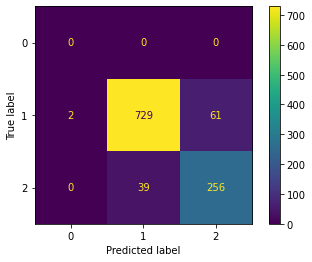

In [307]:
pred00 = r00.predict(x_const)
pred00 = list(map(round,pred00))
print(accuracy_score(y, pred00))
print('\nTest accuracy : \n', accuracy_score(y, pred00))
cm00 = confusion_matrix(y, pred00) 
print ('\nConfusion Matrix : \n', cm00)
cm00_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm00)
cm00_display.plot()

In [308]:
acc_ols = metrics.accuracy_score(y, pred00)
print('accuracy', acc_ols)

pre_ols = metrics.precision_score(y, pred00, average = None)
print('precision', pre_ols)

senrec_ols = metrics.recall_score(y, pred00, average = None)
print('sensitivity recall', senrec_ols)

f1_ols = metrics.f1_score(y, pred00, average = None)
print('f1 score', f1_ols)

pre_ols_m = np.mean(pre_ols)
senrec_ols_m = np.mean(senrec_ols)
f1_ols_m = np.mean(f1_ols)
print('mean precision', pre_ols_m)
print('mean recall', senrec_ols_m)
print('mean f1 score', f1_ols_m)

accuracy 0.906163753449862
precision [0.         0.94921875 0.80757098]
sensitivity recall [0.         0.92045455 0.86779661]
f1 score [0.         0.93461538 0.83660131]
mean precision 0.5855965759726603
mean recall 0.5960837185413457
mean f1 score 0.5904055639349757


E:\Anaconda\Anaconda_file\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### With data splitting

In [309]:
# OLS
X_train, X_test, y_train, y_test = train_test_split(
        x_const, y,
        test_size=0.3,
        random_state=2)

m00_split = sm.OLS(y_train, X_train)
r00_split = m00_split.fit()
r00_split.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    acp   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     16.79
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           1.80e-99
Time:                        16:13:43   Log-Likelihood:                -129.80
No. Observations:                 760   AIC:                             381.6
Df Residuals:                     699   BIC:                             664.2
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4280      0.085      5.012      0.000       0.260       0.596
cp               -0.0267      0.012     -2.188      0.029      -0.051      -0.003
cmin             -0.0587      0.048     -1.230      0.219      -0.152       0.035
ie               -0.0175      0.027     -0.654      0.514      -0.070       0.035
mew               0.2669      0.041      6.478      0.000       0.186       0.348
meg               0.0113      0.050      0.226      0.821      -0.087       0.110
megmax           -0.0006      0.049     -0.012      0.990      -0.096       0.095
dbusl             0.0267      0.029      0.930      0.353      -0.030       0.083
dtraml           -0.0409      0.034     -1.211      0.226      -0.107       0.025
dtrainl          -0.0495      0.038     -1.313      0.190      -0.124       0.025
dplight           0.0320      0.047      0.678      0.498      -0.061       0.125
dstation         -0.0216      0.051     -0.426      0.670      -0.121       0.078
dparkcar          0.0259      0.038      0.680      0.497      -0.049       0.101
dparktw          -0.0531      0.042     -1.255      0.210      -0.136       0.030
dpedcro          -0.1033      0.042     -2.443      0.015      -0.186      -0.020
dstopsign         0.0392      0.047      0.828      0.408      -0.054       0.132
dtrafficarea     -0.0469      0.027     -1.740      0.082      -0.100       0.006
droad             0.2676      0.018     14.496      0.000       0.231       0.304
gvm_dwv          -0.0198      0.035     -0.564      0.573      -0.089       0.049
speedlimit       -0.0427      0.035     -1.229      0.219      -0.111       0.026
bicyclecount      0.2978      0.026     11.536      0.000       0.247       0.349
carcount         -0.0372      0.039     -0.964      0.335      -0.113       0.038
z_qnr_1           0.1462      0.084      1.739      0.082      -0.019       0.311
z_qnr_2          -0.0979      0.093     -1.057      0.291      -0.280       0.084
z_qnr_3           0.1098      0.104      1.052      0.293      -0.095       0.315
z_qnr_4           0.0344      0.077      0.449      0.653      -0.116       0.185
z_qnr_6           0.0942      0.067      1.416      0.157      -0.036       0.225
z_qnr_7          -0.1790      0.075     -2.384      0.017      -0.326      -0.032
z_qnr_9          -0.0242      0.077     -0.314      0.753      -0.175       0.127
z_qnr_11         -0.2220      0.078     -2.846      0.005      -0.375      -0.069
z_qnr_12          0.0733      0.062      1.181      0.238      -0.049       0.195
z_qnr_13          0.3625      0.089      4.091      0.000       0.189       0.536
z_qnr_14          0.0402      0.132      0.306      0.760      -0.218       0.299
z_qnr_17          0.1177      0.071      1.649      0.100      -0.022       0.258
z_qnr_21          0.1162      0.084      1.380   

In [310]:
print(r00_split.rsquared_adj)
printsig(r00_split)

0.5552220466442394


,feature,0,sig
0,const,6.825531e-07,***
1,cp,2.898781e-02,*
2,mew,1.750917e-10,***
3,dpedcro,1.483128e-02,*
4,droad,7.942793e-42,***
5,bicyclecount,2.652187e-28,***
6,z_qnr_7,1.739480e-02,*
7,z_qnr_11,4.560316e-03,**
8,z_qnr_13,4.789087e-05,***
9,z_qnr_22,2.204066e-02,*



Test accuracy : 
 0.8990825688073395

Confusion Matrix : 
 [[221  23]
 [ 10  73]]


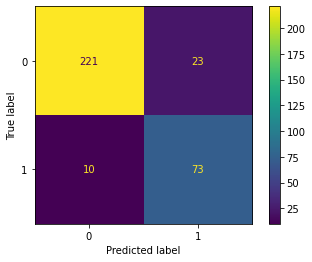

In [311]:
pred00split = r00_split.predict(X_test)
pred00split = list(map(round,pred00split))
print('\nTest accuracy : \n', accuracy_score(y_test, pred00split))
cm00split = confusion_matrix(y_test, pred00split) 
print ('\nConfusion Matrix : \n', cm00split) 
cm00split_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm00split)
cm00split_display.plot()

In [312]:
acc_ols_sp = metrics.accuracy_score(y_test, pred00split)
print('accuracy', acc_ols_sp)

pre_ols_sp = metrics.precision_score(y_test, pred00split, average = None)
print('precision', pre_ols_sp)

senrec_ols_sp = metrics.recall_score(y_test, pred00split, average = None)
print('sensitivity recall', senrec_ols_sp)

f1_ols_sp = metrics.f1_score(y_test, pred00split, average = None)
print('f1 score', f1_ols_sp)

pre_ols_sp_m = np.mean(pre_ols_sp)
senrec_ols_sp_m = np.mean(senrec_ols_sp)
f1_ols_sp_m = np.mean(f1_ols_sp)
print('mean precision', pre_ols_sp_m)
print('mean recall', senrec_ols_sp_m)
print('mean f1 score', f1_ols_sp_m)

accuracy 0.8990825688073395
precision [0.95670996 0.76041667]
sensitivity recall [0.9057377  0.87951807]
f1 score [0.93052632 0.81564246]
mean precision 0.8585633116883117
mean recall 0.8926278886035947
mean f1 score 0.8730843869450162


## Logistic regression

### Without data splitting

In [313]:

# Without constant
# m00_log = sm.Logit(y, x)
# r00_log = m00_log.fit_regularized()
# r00_log.summary()

# Add constant
x_const = tools.add_constant(x)
m00_log = sm.Logit(y,x_const, max_iter = 500)
r00_log = m00_log.fit(method='bfgs')
# r00_log = m00_log.fit()

r00_log.summary()

         Current function value: 0.179618
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


E:\Anaconda\Anaconda_file\lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)
E:\Anaconda\Anaconda_file\lib\site-packages\scipy\optimize\_optimize.py:1360: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
E:\Anaconda\Anaconda_file\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Anaconda\Anaconda_file\lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    acp   No. Observations:                 1087
Model:                          Logit   Df Residuals:                     1026
Method:                           MLE   Df Model:                           60
Date:                Wed, 15 Jan 2025   Pseudo R-squ.:                  0.6928
Time:                        16:13:46   Log-Likelihood:                -195.24
converged:                      False   LL-Null:                       -635.50
Covariance Type:            nonrobust   LLR p-value:                3.552e-146
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.3240      1.125     -1.177      0.239      -3.529       0.881
cp               -0.3763      0.156     -2.417      0.016      -0.681      -0.071
cmin              0.1976      0.713      0.277      0.782      -1.201       1.596
ie               -0.4320      0.342     -1.262      0.207      -1.103       0.239
mew               3.5294      0.565      6.250      0.000       2.423       4.636
meg              -0.0400      0.628     -0.064      0.949      -1.271       1.191
megmax           -0.4075      0.640     -0.637      0.524      -1.662       0.847
dbusl             0.5729      0.405      1.416      0.157      -0.220       1.366
dtraml           -0.4085      0.441     -0.926      0.354      -1.273       0.456
dtrainl           0.3844      0.510      0.753      0.451      -0.616       1.385
dplight          -0.8456      0.615     -1.375      0.169      -2.051       0.360
dstation         -0.8729      0.665     -1.313      0.189      -2.175       0.430
dparkcar          0.0591      0.513      0.115      0.908      -0.946       1.064
dparktw          -0.8349      0.567     -1.472      0.141      -1.947       0.277
dpedcro          -1.5257      0.534     -2.855      0.004      -2.573      -0.478
dstopsign        -0.0563      0.619     -0.091      0.928      -1.270       1.157
dtrafficarea     -0.4375      0.318     -1.374      0.169      -1.062       0.187
droad             2.8322      0.264     10.747      0.000       2.316       3.349
gvm_dwv           0.5480      0.439      1.248      0.212      -0.313       1.409
speedlimit       -1.0083      0.451     -2.238      0.025      -1.891      -0.125
bicyclecount      6.9662      0.848      8.219      0.000       5.305       8.627
carcount          0.2011      0.446      0.450      0.652      -0.674       1.076
z_qnr_1           0.2487      1.252      0.199      0.843      -2.206       2.704
z_qnr_2          -0.3229      1.420     -0.227      0.820      -3.105       2.459
z_qnr_3           0.6010      1.209      0.497      0.619      -1.769       2.971
z_qnr_4           0.5122      0.896      0.572      0.568      -1.244       2.268
z_qnr_6           0.2397      0.733      0.327      0.744      -1.196       1.676
z_qnr_7          -0.8440      1.050     -0.804      0.421      -2.901       1.213
z_qnr_9           0.3941      0.806      0.489      0.625      -1.186       1.974
z_qnr_11         -1.1729      0.845     -1.389      0.165      -2.828       0.482
z_qnr_12          1.5090      0.755      1.999      0.046       0.030       2.988
z_qnr_13          1.6611      0.963      1.725      0.085      -0.226       3.549
z_qnr_14         -0.2098      2.001     -0.105      0.916      -4.131       3.711
z_qnr_17          0.1818      0.945      0.192      0.847      -1.671       2.034
z_qnr_21          0.8702      1.203      0.723      0.469      -1.487       3.227
z_qnr_22         -0.5258      1.301     -0.404      0.686      -3.075       2.024
z_qnr_23         -0.2505      1.053     -0.

In [314]:
print(r00_log.prsquared)
printsig(r00_log)

0.6927690185993924


,feature,0,sig
0,cp,1.564289e-02,*
1,mew,4.095005e-10,***
2,dpedcro,4.309136e-03,**
3,droad,6.144808e-27,***
4,speedlimit,2.523647e-02,*
5,bicyclecount,2.045785e-16,***
6,z_qnr_12,4.556368e-02,*
7,z_knr_10,5.273067e-03,**


0.9153633854645814

Test accuracy : 
 0.9153633854645814

Confusion Matrix : 
 [[740  52]
 [ 40 255]]
accuracy 0.9153633854645814
precision [0.94871795 0.83061889]
sensitivity recall [0.93434343 0.86440678]
f1 score [0.94147583 0.84717608]
mean precision 0.8896684206130461
mean recall 0.8993751070022257
mean f1 score 0.8943259533531147


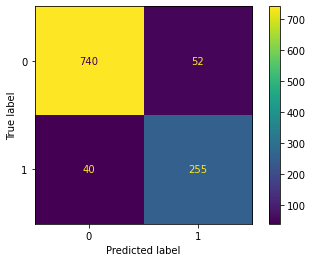

In [315]:
pred00log = r00_log.predict(x_const)
pred00log = list(map(round,pred00log))
print(accuracy_score(y, pred00log))
print('\nTest accuracy : \n', accuracy_score(y, pred00log))
cm00log = confusion_matrix(y, pred00log) 
print ('\nConfusion Matrix : \n', cm00log)
cm00log_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm00log)
cm00log_display.plot()

acc_log = metrics.accuracy_score(y, pred00log)
print('accuracy', acc_log)

pre_log = metrics.precision_score(y, pred00log, average = None)
print('precision', pre_log)

senrec_log = metrics.recall_score(y, pred00log, average = None)
print('sensitivity recall', senrec_log)

f1_log = metrics.f1_score(y, pred00log, average = None)
print('f1 score', f1_log)

pre_log_m = np.mean(pre_log)
senrec_log_m = np.mean(senrec_log)
f1_log_m = np.mean(f1_log)
print('mean precision', pre_log_m)
print('mean recall', senrec_log_m)
print('mean f1 score', f1_log_m)

### With data splitting

In [316]:

X_train1, X_test1, y_train1, y_test1 = train_test_split(
        x_const, y,
        test_size=0.25,
        random_state=7)
m00_log_split = sm.Logit(y_train1,X_train1, max_iter = 10000)
r00_log_split = m00_log_split.fit(method='bfgs')
r00_log_split.summary()

         Current function value: 0.179164
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


E:\Anaconda\Anaconda_file\lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)
E:\Anaconda\Anaconda_file\lib\site-packages\scipy\optimize\_optimize.py:1360: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
E:\Anaconda\Anaconda_file\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Anaconda\Anaconda_file\lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    acp   No. Observations:                  815
Model:                          Logit   Df Residuals:                      754
Method:                           MLE   Df Model:                           60
Date:                Wed, 15 Jan 2025   Pseudo R-squ.:                  0.6947
Time:                        16:13:50   Log-Likelihood:                -146.02
converged:                      False   LL-Null:                       -478.26
Covariance Type:            nonrobust   LLR p-value:                8.383e-103
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.0248      1.578     -0.649      0.516      -4.118       2.068
cp               -0.5411      0.195     -2.771      0.006      -0.924      -0.158
cmin              0.7933      1.154      0.688      0.492      -1.468       3.054
ie               -0.8007      0.414     -1.936      0.053      -1.611       0.010
mew               3.6324      0.669      5.430      0.000       2.321       4.944
meg              -0.2238      0.756     -0.296      0.767      -1.706       1.258
megmax           -0.1855      0.760     -0.244      0.807      -1.675       1.304
dbusl             0.8783      0.477      1.841      0.066      -0.057       1.813
dtraml           -0.3246      0.514     -0.631      0.528      -1.332       0.683
dtrainl           0.6039      0.620      0.974      0.330      -0.611       1.819
dplight          -1.1531      0.783     -1.473      0.141      -2.688       0.382
dstation         -1.4212      0.831     -1.711      0.087      -3.049       0.207
dparkcar          0.1981      0.608      0.326      0.745      -0.994       1.390
dparktw          -0.6935      0.660     -1.052      0.293      -1.986       0.599
dpedcro          -1.6546      0.644     -2.569      0.010      -2.917      -0.392
dstopsign        -0.2651      0.742     -0.357      0.721      -1.719       1.188
dtrafficarea     -0.5623      0.399     -1.408      0.159      -1.345       0.220
droad             2.8781      0.320      8.984      0.000       2.250       3.506
gvm_dwv           0.5520      0.515      1.071      0.284      -0.458       1.562
speedlimit       -1.0916      0.534     -2.044      0.041      -2.138      -0.045
bicyclecount      6.9914      1.017      6.874      0.000       4.998       8.985
carcount         -0.0080      0.546     -0.015      0.988      -1.078       1.062
z_qnr_1           0.5644      1.799      0.314      0.754      -2.961       4.090
z_qnr_2          -0.2837      1.701     -0.167      0.867      -3.617       3.049
z_qnr_3           0.2411      1.497      0.161      0.872      -2.693       3.176
z_qnr_4           0.1504      1.080      0.139      0.889      -1.966       2.267
z_qnr_6           0.6948      0.889      0.781      0.435      -1.048       2.438
z_qnr_7          -1.0258      1.193     -0.860      0.390      -3.363       1.312
z_qnr_9           0.0868      0.887      0.098      0.922      -1.652       1.826
z_qnr_11         -1.0822      0.928     -1.166      0.244      -2.901       0.737
z_qnr_12          0.7351      0.900      0.817      0.414      -1.029       2.500
z_qnr_13          1.5056      1.182      1.273      0.203      -0.812       3.823
z_qnr_14         -0.0559      2.239     -0.025      0.980      -4.445       4.333
z_qnr_17          0.0593      1.283      0.046      0.963      -2.456       2.575
z_qnr_21          0.4940      1.372      0.360      0.719      -2.195       3.183
z_qnr_22         -0.4955      1.614     -0.307      0.759      -3.658       2.667
z_qnr_23         -0.2752      1.214     -0.

In [317]:
print(r00_log_split.prsquared)
printsig(r00_log_split)

0.6946895006341105


,feature,0,sig
0,cp,5.594369e-03,**
1,mew,5.627557e-08,***
2,dpedcro,1.019935e-02,*
3,droad,2.604465e-19,***
4,speedlimit,4.095362e-02,*
5,bicyclecount,6.240357e-12,***
6,z_knr_10,3.447316e-02,*
7,r_width_1,3.336867e-02,*


0.8933823529411765

Test accuracy : 
 0.8933823529411765

Confusion Matrix : 
 [[186  14]
 [ 15  57]]
accuracy 0.8933823529411765
precision [0.92537313 0.8028169 ]
sensitivity recall [0.93       0.79166667]
f1 score [0.9276808 0.7972028]
mean precision 0.8640950178684045
mean recall 0.8608333333333333
mean f1 score 0.8624417976038923


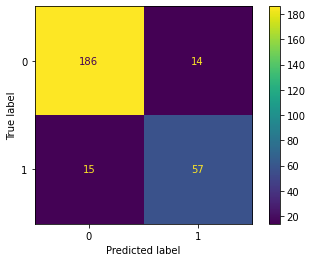

In [318]:
pred00log_split = r00_log_split.predict(X_test1)
pred00log_split = list(map(round,pred00log_split))
print(accuracy_score(y_test1, pred00log_split))
print('\nTest accuracy : \n', accuracy_score(y_test1, pred00log_split))
cm00log_split = confusion_matrix(y_test1, pred00log_split) 
print ('\nConfusion Matrix : \n', cm00log_split)
cm00log_split_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm00log_split)
cm00log_split_display.plot()

acc_log_split = metrics.accuracy_score(y_test1, pred00log_split)
print('accuracy', acc_log_split)

pre_log_split = metrics.precision_score(y_test1, pred00log_split, average = None)
print('precision', pre_log_split)

senrec_log_split = metrics.recall_score(y_test1, pred00log_split, average = None)
print('sensitivity recall', senrec_log_split)

f1_log_split = metrics.f1_score(y_test1, pred00log_split, average = None)
print('f1 score', f1_log_split)

pre_log_split_m = np.mean(pre_log_split)
senrec_log_split_m = np.mean(senrec_log_split)
f1_log_split_m = np.mean(f1_log_split)
print('mean precision', pre_log_split_m)
print('mean recall', senrec_log_split_m)
print('mean f1 score', f1_log_split_m)

# Step wise feature selection

In [161]:
# Check sklearn metrics name for feature selection
# sklearn.metrics.get_scorer_names()

## Ordinary Least Squares Regression model

### Sequential forward floating selection

In [ ]:
# def fs_output_sum(type, cv_start, cv_end, cv_step, x, y):
#     pa1 = ['neg_mean_squared_error', 
#            'r2',
#            'neg_median_absolute_error',
#            'neg_mean_absolute_error']
#     pa2 = ['accuracy',
#            'f1',
#            'precision',
#            'recall']
#     if type == 'linear':
#         sel_cols_f = pd.DataFrame()
#         sel_cols_b = pd.DataFrame()
#         for p in range(0,3):
#             for i in range(cv_start, cv_end, cv_step):
#                 sffslin = featureselection_lin(True, pa1[p], i, x, y)
#                 sbfslin = featureselection_lin(False, pa1[p], i, x, y)
#                 sel_cols_f[pa1[p]] = list(sffslin.k_feature_names_)
#                 sel_cols_b[pa1[p]] = list(sbfslin.k_feature_names_)
#     elif type == 'logistic':
#         sel_cols_f = pd.DataFrame()
#         sel_cols_b = pd.DataFrame()
#         for q in range(0,3):
#             for t in range(cv_start, cv_end, cv_step):
#                 sffslog = featureselection_log(True, pa2[q], t, x, y)
#                 sbfslog = featureselection_log(False, pa2[q], t, x, y)
#                 sel_cols_f[pa2[q]] = list(sffslog.k_feature_names_)
#                 sel_cols_b[pa2[q]] = list(sbfslog.k_feature_names_)
#     else:
#         print('Error, invalid input!')
#     return sel_cols_f, sel_cols_b


In [206]:
# # n = best, linear regression, scoring = neg_mean_squared_error, cv = 5
sffslin0 = featureselection_lin(True, 'neg_mean_squared_error', 5, x, y) 
print(sffslin0.k_feature_names_)
print(len(sffslin0.k_feature_names_))
print(sffslin0.k_score_)


('cmean', 'mew', 'dvfpath', 'z_qnr_1', 'z_qnr_9')
5
-0.015994700043457807


In [207]:
# # # n = best, linear regression, scoring = neg_mean_squared_error, cv = 10
# sffslin1 = featureselection_lin(True, 'neg_mean_squared_error', 10, x, y) 
# print(sffslin1.k_feature_names_)
# print(len(sffslin1.k_feature_names_))
# print(sffslin1.k_score_)


In [208]:
# # n = best, linear regression, scoring = r2, cv = 5
sffslin2 = featureselection_lin(True, 'r2', 5, x, y) 
print(sffslin2.k_feature_names_)
print(len(sffslin2.k_feature_names_))
print(sffslin2.k_score_)

('cmean', 'mew', 'meg', 'megmax', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dtrafficarea', 'droad', 'dvfpath', 'speedlimit', 'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_7', 'z_qnr_9', 'z_qnr_11', 'z_qnr_18', 'z_qnr_20', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_30', 'z_qnr_32', 'z_knr_2', 'z_knr_3', 'z_knr_7', 'z_knr_10', 'trafficarea_2', 'r_width_1', 'r_width_6', 'speedlimit_3')
38
0.1837072197978606


In [209]:
# # n = best, linear regression, scoring = r2, cv = 10
# sffslin3 = featureselection_lin(True, 'r2', 10, x, y) 
# print(sffslin3.k_feature_names_)
# print(len(sffslin3.k_feature_names_))
# print(sffslin3.k_score_)

In [210]:
# # # n = best, linear regression, scoring = neg median absolute error, cv = 5
sffslin4 = featureselection_lin(True, 'neg_median_absolute_error', 5, x, y) 
print(sffslin4.k_feature_names_)
print(len(sffslin4.k_feature_names_))
print(sffslin4.k_score_)

('dvfpath', 'z_qnr_1', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_19', 'z_qnr_25', 'z_qnr_26', 'z_qnr_30', 'z_knr_3', 'z_knr_5', 'trafficarea_1', 'trafficarea_2', 'speedlimit_6')
14
-0.02739052138708087


In [211]:
# # # # n = best, linear regression, scoring = neg median absolute error, cv = 10
# sffslin5 = featureselection_lin(True, 'neg_median_absolute_error', 10, x, y) 
# print(sffslin5.k_feature_names_)
# print(len(sffslin5.k_feature_names_))
# print(sffslin5.k_score_)

In [212]:
# # # n = best, linear regression, scoring = neg mean absolute error, cv = 5
sffslin6 = featureselection_lin(True, 'neg_mean_absolute_error', 5, x, y) 
print(sffslin6.k_feature_names_)
print(len(sffslin6.k_feature_names_))
print(sffslin6.k_score_)

('cmean', 'dstation', 'dvfpath', 'z_qnr_1', 'z_qnr_9', 'r_width_4', 'speedlimit_6')
7
-0.0604594608829936


In [ ]:
# # # # n = best, linear regression, scoring = neg mean absolute error, cv = 10
# sffslin7 = featureselection_lin(True, 'neg_mean_absolute_error', 10, x, y) 
# print(sffslin7.k_feature_names_)
# print(len(sffslin7.k_feature_names_))
# print(sffslin7.k_score_)

In [213]:
selected_columns_linr_sffs = []
selected_columns_linr_sffs = {'nmse_cv5':list(sffslin0.k_feature_names_), 
#                               'nmse_cv10':list(sffslin1.k_feature_names_), 
                              'r2_cv5':list(sffslin2.k_feature_names_), 
#                               'r2_cv10':list(sffslin3.k_feature_names_), 
                              'nmedae_cv5':list(sffslin4.k_feature_names_), 
#                               'nmedae_cv10':list(sffslin5.k_feature_names_), 
                              'nmeae_cv5':list(sffslin6.k_feature_names_) 
#                               'nmeae_cv10':list(sffslin7.k_feature_names_)
                             }

In [214]:
df_sf_linr_sffs = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in selected_columns_linr_sffs.items()]))

In [215]:
# df_sf_linr_sffs.to_csv('/home/yelhe/script/mtp/tables/updated_sffs_linearreg.csv', index = True)

In [129]:
lin_sffs = []

In [143]:
# 0 2 4 6
selected_columns = list(sffslin6.k_feature_names_)
selected_columns

['cp',
 'dstation',
 'dtrafficarea',
 'droad',
 'dvfpath',
 'z_qnr_9',
 'r_width_4',
 'speedlimit_6']

In [144]:
# OLS
xs = dfacrpv[selected_columns]
x_const_s = tools.add_constant(xs)
X_train, X_test, y_train, y_test = train_test_split(
        x_const_s, y,
        test_size=0.4,
        random_state=3)

m0 = sm.OLS(y_train, X_train)
r0 = m0.fit()
r0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    acp   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     935.0
Date:                Mon, 13 Jan 2025   Prob (F-statistic):               0.00
Time:                        18:50:28   Log-Likelihood:                 442.18
No. Observations:                 652   AIC:                            -866.4
Df Residuals:                     643   BIC:                            -826.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5590      0.008     73.868      0.000       0.544       0.574
cp              -0.0106      0.005     -2.132      0.033      -0.020      -0.001
dstation        -0.0540      0.018     -3.018      0.003      -0.089      -0.019
dtrafficarea     0.0147      0.008      1.895      0.059      -0.001       0.030
droad           -0.0077      0.009     -0.876      0.381      -0.025       0.010
dvfpath          0.5428      0.008     67.505      0.000       0.527       0.559
z_qnr_9         -0.0216      0.028     -0.773      0.440      -0.077       0.033
r_width_4        0.0033      0.013      0.258      0.796      -0.022       0.028
speedlimit_6     0.0462      0.058      0.801      0.423      -0.067       0.159
==============================================================================
Omnibus:                      601.824   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14018.109
Skew:                           4.296   Prob(JB):                         0.00
Kurtosis:                      24.028   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [145]:
lin_sffs.append(r0.rsquared_adj)

In [146]:
lin_sffs

[0.9191685317933895, 0.9251887469761979, 0.921343619834913, 0.9198562310740566]

In [147]:
printsig(r0)

    feature              0  sig
0     const  2.450239e-316  ***
1        cp   3.336357e-02    *
2  dstation   2.641197e-03   **
3   dvfpath  4.704111e-294  *** 4


,feature,0,sig
0,const,2.450239e-316,***
1,cp,3.336357e-02,*
2,dstation,2.641197e-03,**
3,dvfpath,4.704111e-294,***


### Sequential backward floating selection

In [108]:
# # n = best, linear regression, backward, scoring = neg_mean_squared_error, cv = 5
sbfslin0 = featureselection_lin(False, 'neg_mean_squared_error', 5, x, y) 
print(sbfslin0.k_feature_names_)
print(len(sbfslin0.k_feature_names_))
print(sbfslin0.k_score_)

('cp', 'mew', 'dvfpath', 'z_qnr_1', 'z_qnr_9')
5
-0.015999212524544833


In [ ]:
# # # n = best, linear regression, backward, scoring = neg_mean_squared_error, cv = 10
# sbfslin1 = featureselection_lin(False, 'neg_mean_squared_error', 10, x, y) 
# print(sbfslin1.k_feature_names_)
# print(len(sbfslin1.k_feature_names_))
# print(sbfslin1.k_score_)


In [109]:
# # n = best, linear regression, backward, scoring = r2, cv = 5
sbfslin2 = featureselection_lin(False, 'r2', 5, x, y) 
print(sbfslin2.k_feature_names_)
print(len(sbfslin2.k_feature_names_))
print(sbfslin2.k_score_)

('cp', 'cmin', 'mew', 'meg', 'megmax', 'dtraml', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dstopsign', 'dtrafficarea', 'droad', 'dvfpath', 'speedlimit', 'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_7', 'z_qnr_9', 'z_qnr_11', 'z_qnr_18', 'z_qnr_20', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_30', 'z_qnr_32', 'z_knr_2', 'z_knr_3', 'z_knr_7', 'z_knr_10', 'trafficarea_2', 'r_width_1', 'r_width_6', 'speedlimit_3')
37
0.18363509431779046


In [ ]:
# # # n = best, linear regression, backward, scoring = r2, cv = 10
# sbfslin3 = featureselection_lin(False, 'r2', 10, x, y) 
# print(sbfslin3.k_feature_names_)
# print(len(sbfslin3.k_feature_names_))
# print(sbfslin3.k_score_)

In [110]:
# # n = best, linear regression, backward, scoring = neg median aboslute error, cv = 5
sbfslin4 = featureselection_lin(False, 'neg_median_absolute_error', 5, x, y) 
print(sbfslin4.k_feature_names_)
print(len(sbfslin4.k_feature_names_))
print(sbfslin4.k_score_)

('dvfpath', 'z_qnr_1', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_19', 'z_qnr_25', 'z_qnr_26', 'z_qnr_30', 'z_knr_3', 'z_knr_5', 'trafficarea_1', 'trafficarea_2', 'speedlimit_6')
14
-0.02739052138708087


In [ ]:
# # # n = best, linear regression, backward, scoring = neg median aboslute error, cv = 10
# sbfslin5 = featureselection_lin(False, 'neg_median_absolute_error', 10, x, y) 
# print(sbfslin5.k_feature_names_)
# print(len(sbfslin5.k_feature_names_))
# print(sbfslin5.k_score_)

In [111]:
# # n = best, linear regression, backward, scoring = neg mean absolute error, cv = 5
sbfslin6 = featureselection_lin(False, 'neg_mean_absolute_error', 5, x, y) 
print(sbfslin6.k_feature_names_)
print(len(sbfslin6.k_feature_names_))
print(sbfslin6.k_score_)

('dstation', 'dtrafficarea', 'droad', 'dvfpath', 'r_width_4', 'speedlimit_6')
6
-0.06043980890831002


In [ ]:
# # # n = best, linear regression, backward, scoring = neg mean aboslute error, cv = 10
# sbfslin7 = featureselection_lin(False, 'neg_mean_absolute_error', 10, x, y) 
# print(sbfslin7.k_feature_names_)
# print(len(sbfslin7.k_feature_names_))
# print(sbfslin7.k_score_)

In [112]:
selected_columns_linr_sbfs = []
selected_columns_linr_sbfs = {'nmse_cv5':list(sbfslin0.k_feature_names_), 
#                               'nmse_cv10':list(sbfslin1.k_feature_names_), 
                              'r2_cv5':list(sbfslin2.k_feature_names_), 
#                               'r2_cv10':list(sbfslin3.k_feature_names_), 
                              'nmedae_cv5':list(sbfslin4.k_feature_names_), 
#                               'nmedae_cv10':list(sbfslin5.k_feature_names_),
                              'nmeae_cv5':list(sbfslin6.k_feature_names_)
#                               , 'nmeae_cv10':list(sbfslin7.k_feature_names_)
                             }

In [113]:
df_sf_linr_sbfs = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in selected_columns_linr_sbfs.items()]))

In [ ]:
# df_sf_linr_sbfs.to_csv('/home/yelhe/script/mtp/tables/updated_sbfs_linearreg.csv', index = True)

In [ ]:
sbfs_columns = list(sbfslin7.k_feature_names_)

In [ ]:
# df_output = pd.read_csv('/home/yelhe/script/mtp/tables/updated_sbfs_linearreg.csv')

In [149]:
lin_sbfs = []

In [162]:
# 0 2 4 6
selected_columns = list(sbfslin6.k_feature_names_)
selected_columns

['dstation', 'dtrafficarea', 'droad', 'dvfpath', 'r_width_4', 'speedlimit_6']

In [163]:
# OLS
xs = dfacrpv[selected_columns]
x_const_s = tools.add_constant(xs)
X_train, X_test, y_train, y_test = train_test_split(
        x_const_s, y,
        test_size=0.4,
        random_state=3)

m1 = sm.OLS(y_train, X_train)
r1 = m1.fit()
r1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    acp   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     1239.
Date:                Mon, 13 Jan 2025   Prob (F-statistic):               0.00
Time:                        18:59:15   Log-Likelihood:                 439.46
No. Observations:                 652   AIC:                            -864.9
Df Residuals:                     645   BIC:                            -833.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5567      0.007     74.881      0.000       0.542       0.571
dstation        -0.0526      0.018     -2.943      0.003      -0.088      -0.018
dtrafficarea     0.0159      0.008      2.058      0.040       0.001       0.031
droad           -0.0096      0.009     -1.097      0.273      -0.027       0.008
dvfpath          0.5436      0.008     67.932      0.000       0.528       0.559
r_width_4        0.0033      0.013      0.259      0.796      -0.022       0.028
speedlimit_6     0.0457      0.058      0.792      0.429      -0.068       0.159
==============================================================================
Omnibus:                      607.595   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14460.303
Skew:                           4.353   Prob(JB):                         0.00
Kurtosis:                      24.366   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [164]:
lin_sbfs.append(r1.rsquared_adj)
lin_sbfs

[0.9191685317933895, 0.92505771116867, 0.921343619834913, 0.9194352568477968]

In [165]:
printsig(r1)

        feature              0  sig
0         const  2.411040e-320  ***
1      dstation   3.364243e-03   **
2  dtrafficarea   4.000373e-02    *
3       dvfpath  3.953558e-296  *** 4


,feature,0,sig
0,const,2.411040e-320,***
1,dstation,3.364243e-03,**
2,dtrafficarea,4.000373e-02,*
3,dvfpath,3.953558e-296,***


## Logistic Regression model

### Sequential forward floating selection

In [166]:
# # n = best, logistic regression, scoring = accuracy, cv = 5
sffslog0 = featureselection_log(True, 'accuracy', 5, x, y)
print(sffslog0.k_feature_names_)
print(len(sffslog0.k_feature_names_))
print(sffslog0.k_score_)

('cp', 'cmin', 'ie', 'mew', 'meg', 'megmax', 'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dvfpath', 'speedlimit', 'bicyclecount', 'z_qnr_1', 'z_qnr_7', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_13', 'z_qnr_14', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_knr_2', 'z_knr_3', 'z_knr_7', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_4', 'r_width_6', 'speedlimit_2', 'speedlimit_6')
51
0.9908087768993363


In [ ]:
# # n = best, logistic regression, scoring = accuracy, cv = 10
# sffslog1 = featureselection_log(True, 'accuracy', 10, x, y)
# print(sffslog1.k_feature_names_)
# print(len(sffslog1.k_feature_names_))
# print(sffslog1.k_score_)


In [167]:
# # n = best, logistic regression, scoring = f1, cv = 5
sffslog2 = featureselection_log(True, 'f1', 5, x, y)
print(sffslog2.k_feature_names_)
print(len(sffslog2.k_feature_names_))
print(sffslog2.k_score_)

('cp', 'cmin', 'ie', 'mew', 'meg', 'megmax', 'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dtrafficarea', 'dvfpath', 'gvm_dwv', 'speedlimit', 'bicyclecount', 'z_qnr_1', 'z_qnr_7', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_13', 'z_qnr_14', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18', 'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_knr_2', 'z_knr_3', 'z_knr_7', 'r_width_1', 'r_width_2', 'r_width_4', 'r_width_6', 'speedlimit_2', 'speedlimit_3', 'speedlimit_6')
54
0.9826376285541439


In [ ]:
# # # n = best, logistic regression, scoring = f1, cv = 10
# sffslog3 = featureselection_log(True, 'f1', 10, x, y)
# print(sffslog3.k_feature_names_)
# print(len(sffslog3.k_feature_names_))
# print(sffslog3.k_score_)


In [169]:
# n = best, logistic regression, scoring = precision, cv = 5
sffslog4 = featureselection_log(True, 'precision', 5, x, y)
print(sffslog4.k_feature_names_)
print(len(sffslog4.k_feature_names_))
print(sffslog4.k_score_)


('dvfpath',)
1
1.0


In [ ]:
# # # # n = best, logistic regression, scoring = precision, cv = 10
# sffslog5 = featureselection_log(True, 'precision', 10, x, y)
# print(sffslog5.k_feature_names_)
# print(len(sffslog5.k_feature_names_))
# print(sffslog5.k_score_)

In [170]:
# # n = best, logistic regression, scoring = recall, cv = 5
sffslog6 = featureselection_log(True, 'recall', 5, x, y)
print(sffslog6.k_feature_names_)
print(len(sffslog6.k_feature_names_))
print(sffslog6.k_score_)


('cp', 'cmin', 'ie', 'mew', 'meg', 'megmax', 'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dtrafficarea', 'dvfpath', 'gvm_dwv', 'speedlimit', 'bicyclecount', 'z_qnr_1', 'z_qnr_7', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_13', 'z_qnr_14', 'z_qnr_16', 'z_qnr_17', 'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_knr_2', 'z_knr_3', 'z_knr_7', 'z_knr_10', 'r_width_1', 'r_width_4', 'r_width_6', 'speedlimit_2', 'speedlimit_6')
52
0.9661016949152543


In [ ]:
# # # n = best, logistic regression, scoring = recall, cv = 10
# sffslog7 = featureselection_log(True, 'recall', 10, x, y)
# print(sffslog7.k_feature_names_)
# print(len(sffslog7.k_feature_names_))
# print(sffslog7.k_score_)


In [171]:
# For part 
selected_columns_logr_sffs = []
selected_columns_logr_sffs = {
                              'acc_cv5':list(sffslog0.k_feature_names_), 
#                               'acc_cv10':list(sffslog1.k_feature_names_), 
                              'f1_cv5':list(sffslog2.k_feature_names_), 
#                               'f1_cv10':list(sffslog3.k_feature_names_), 
                              'pre_cv5':list(sffslog4.k_feature_names_), 
#                               'pre_cv10':list(sffslog5.k_feature_names_),
                              'rec_cv5':list(sffslog6.k_feature_names_)
#     ,                           'rec_cv10':list(sffslog7.k_feature_names_)
                              }
df_sf_logr_sffs = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in selected_columns_logr_sffs.items()]))
# df_sf_logr_sffs.to_csv('/home/yelhe/script/mtp/tables/vif_sffs_logisticreg.csv', index = True)

### Sequential backward floating selection

In [172]:
# n = best, logistic regression, scoring = accuracy, cv = 5
sbfslog0 = featureselection_log(False, 'accuracy', 5, x, y)
print(sbfslog0.k_feature_names_)
print(len(sbfslog0.k_feature_names_))
print(sbfslog0.k_score_)


('cp', 'cmin', 'ie', 'mew', 'meg', 'megmax', 'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dtrafficarea', 'dvfpath', 'gvm_dwv', 'r_width', 'speedlimit', 'bicyclecount', 'z_qnr_1', 'z_qnr_7', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_16', 'z_qnr_17', 'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_knr_2', 'z_knr_3', 'z_knr_5', 'z_knr_7', 'z_knr_10', 'trafficarea_2', 'r_width_1')
52
0.9917262080919969


In [ ]:
# # n = best, logistic regression, scoring = accuracy, cv = 10
# sbfslog1 = featureselection_log(False, 'accuracy', 10, x, y)
# print(sbfslog1.k_feature_names_)
# print(len(sbfslog1.k_feature_names_))
# print(sbfslog1.k_score_)


In [173]:
# n = best, logistic regression, scoring = f1, cv = 5
sbfslog2 = featureselection_log(False, 'f1', 5, x, y)
print(sbfslog2.k_feature_names_)
print(len(sbfslog2.k_feature_names_))
print(sbfslog2.k_score_)

('cp', 'cmin', 'ie', 'mew', 'meg', 'megmax', 'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dtrafficarea', 'dvfpath', 'gvm_dwv', 'r_width', 'speedlimit', 'bicyclecount', 'z_qnr_1', 'z_qnr_7', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_16', 'z_qnr_17', 'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_knr_2', 'z_knr_3', 'z_knr_5', 'z_knr_7', 'z_knr_10', 'trafficarea_2', 'r_width_1')
52
0.9844377811094454


In [ ]:
# # n = best, logistic regression, scoring = f1, cv = 10
# sbfslog3 = featureselection_log(False, 'f1', 10, x, y)
# print(sbfslog3.k_feature_names_)
# print(len(sbfslog3.k_feature_names_))
# print(sbfslog3.k_score_)

In [174]:
# n = best, logistic regression, scoring = precision, cv = 5
sbfslog4 = featureselection_log(False, 'precision', 5, x, y)
print(sbfslog4.k_feature_names_)
print(len(sbfslog4.k_feature_names_))
print(sbfslog4.k_score_)


('cp', 'cmin', 'ie', 'mew', 'meg', 'megmax', 'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'r_width', 'speedlimit', 'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_7', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18', 'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_knr_2', 'z_knr_3', 'z_knr_5', 'z_knr_7', 'z_knr_10', 'trafficarea_1', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_4', 'r_width_6', 'speedlimit_2', 'speedlimit_3', 'speedlimit_5', 'speedlimit_6')
63
1.0


In [ ]:
# # n = best, logistic regression, scoring = precision, cv = 10
# sbfslog5 = featureselection_log(False, 'precision', 10, x, y)
# print(sbfslog5.k_feature_names_)
# print(len(sbfslog5.k_feature_names_))
# print(sbfslog5.k_score_)


In [175]:
# n = best, logistic regression, scoring = recall, cv = 5
sbfslog6 = featureselection_log(False, 'recall', 5, x, y)
print(sbfslog6.k_feature_names_)
print(len(sbfslog6.k_feature_names_))
print(sbfslog6.k_score_)

('cp', 'cmin', 'ie', 'mew', 'meg', 'megmax', 'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dtrafficarea', 'dvfpath', 'gvm_dwv', 'r_width', 'speedlimit', 'bicyclecount', 'z_qnr_1', 'z_qnr_7', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_16', 'z_qnr_17', 'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_knr_2', 'z_knr_3', 'z_knr_5', 'z_knr_7', 'z_knr_10', 'trafficarea_2', 'r_width_1')
52
0.9694915254237289


In [ ]:
# # n = best, logistic regression, scoring = recall, cv = 10
# sbfslog7 = featureselection_log(False, 'recall', 10, x, y)
# print(sbfslog7.k_feature_names_)
# print(len(sbfslog7.k_feature_names_))
# print(sbfslog7.k_score_)

In [176]:
# For all 
selected_columns_logr_sbfs = []
selected_columns_logr_sbfs = {
                              'acc_cv5':list(sbfslog0.k_feature_names_), 
#                               'acc_cv10':list(sbfslog1.k_feature_names_),
                              'f1_cv5':list(sbfslog2.k_feature_names_), 
#                               'f1_cv10':list(sbfslog3.k_feature_names_),
                              'pre_cv5':list(sbfslog4.k_feature_names_), 
#                               'pre_cv10':list(sbfslog5.k_feature_names_),
                              'rec_cv5':list(sbfslog6.k_feature_names_) 
#                               ,'rec_cv10':list(sbfslog7.k_feature_names_)
                              }
df_sf_logr_sbfs = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in selected_columns_logr_sbfs.items()]))
# df_sf_logr_sbfs.to_csv('/home/yelhe/script/mtp/tables/vif_sbfs_logisticreg.csv', index = True)

In [ ]:
# df_output = pd.read_csv('/home/yelhe/script/mtp/tables/vif_sbfs_logisticreg.csv')

In [278]:
log_sffs = []
log_sbfs = []

In [286]:
# 0 2 4 6
selected_columns = list(sffslog6.k_feature_names_)
print(len(selected_columns))

52


In [307]:
# # logit with splitting
# xs = dfacrpv[selected_columns]
# x_const_s = tools.add_constant(xs)
# X_train, X_test, y_train, y_test = train_test_split(
#         x_const_s, y,
#         test_size=0.2,
#         random_state=10)

# m2 = sm.Logit(y_train, X_train, max_iter = 500)
# r2 = m2.fit_regularized(method='bfgs')
# r2.summary()

In [308]:
# print(r2.prsquared)
# printsig(r2)

In [279]:
log_sffs.append(r2.prsquared)
log_sffs

[0.9921522649540905]

In [303]:
# 0 2 4 6
selected_columns = list(sbfslog6.k_feature_names_)

In [309]:
# # logit with splitting
# xs = dfacrpv[selected_columns]
# x_const_s = tools.add_constant(xs)
# X_train, X_test, y_train, y_test = train_test_split(
#         x_const_s, y,
#         test_size=0.2,
#         random_state=13)

# m3 = sm.Logit(y_train, X_train, max_iter = 500)
# r3 = m3.fit(method='bfgs')
# r3.summary()

In [312]:
# print(r3.prsquared)
# printsig(r3)

In [306]:
log_sbfs.append(r3.prsquared)

# Random Forest Classification

In [ ]:
# This section is application of random forest classification 
# for presence of accidents

In [351]:
print(len(cn))

91


Train data accuracy: 1.0
Test data accuracy: 0.9418960244648318
accuracy 0.9418960244648318
precision [0.94047619 0.94666667]
sensitivity recall [0.98340249 0.8255814 ]
f1 score [0.96146045 0.88198758]
mcc score 0.8471624844736686
kappa 0.8436863159483734


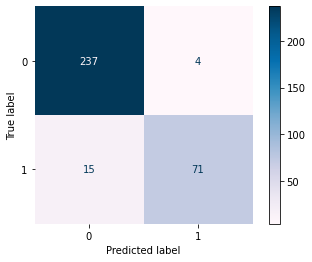

In [352]:
# RF classification using independent variables without filtering (to be compared with)
y0 = dfacrpv['acp']
x0 = dfacrpv[cn]

X_train, X_test, y_train, y_test = train_test_split(x0, y0,
                                                    test_size = 0.3, 
                                                    random_state = 7)
rfc = RandomForestClassifier(n_estimators = 30, max_depth=20, 
                              random_state = 6) 
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = rfc.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred_rfc))
confusion_matrix_rfc = metrics.confusion_matrix(y_test, y_pred_rfc)
cm_display_rfc = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rfc)
cm_display_rfc.plot(cmap = 'PuBu')
plt.box(False)
acc_rfc = metrics.accuracy_score(y_test, y_pred_rfc)
print('accuracy', acc_rfc)
pre_rfc = metrics.precision_score(y_test, y_pred_rfc, average = None)
print('precision', pre_rfc)
senrec_rfc = metrics.recall_score(y_test, y_pred_rfc, average = None)
print('sensitivity recall', senrec_rfc)
f1_rfc = metrics.f1_score(y_test, y_pred_rfc, average = None)
print('f1 score', f1_rfc)
mcc_rfc = metrics.matthews_corrcoef(y_test, y_pred_rfc)
print('mcc score', mcc_rfc)
ka_rfc= metrics.cohen_kappa_score(y_test, y_pred_rfc)
print('kappa', ka_rfc)

E:\Anaconda\Anaconda_file\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
E:\Anaconda\Anaconda_file\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
E:\Anaconda\Anaconda_file\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
E:\Anaconda\Anaconda_file\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
E:\Anaconda\Anaconda_file\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
E:\Anaconda\Anaconda_file\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClass

Text(0, 0.5, 'accuracy')

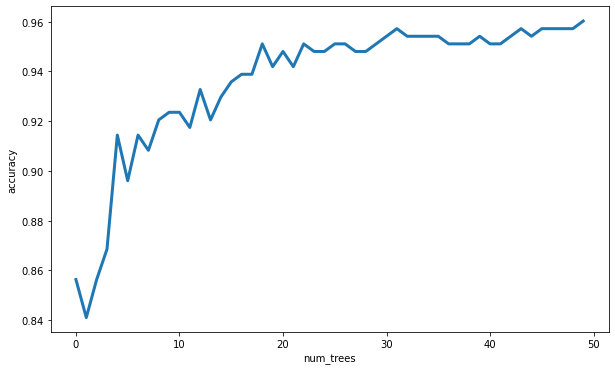

In [326]:
# Finding the best number of estimator
rf = RandomForestClassifier(n_estimators=50, max_depth= 20, n_jobs=-1)
rf.fit(X_train, y_train)
predictions = []
for tree in rf.estimators_:
    predictions.append(tree.predict_proba(X_test)[None, :])
predictions = np.vstack(predictions)
cum_mean = np.cumsum(predictions, axis=0)/np.arange(1, predictions.shape[0] + 1)[:, None, None]
scores = []
for pred in cum_mean:
    scores.append(accuracy_score(y_test, np.argmax(pred, axis=1)))
plt.figure(figsize=(10, 6))
plt.plot(scores, linewidth=3)
plt.xlabel('num_trees')
plt.ylabel('accuracy')


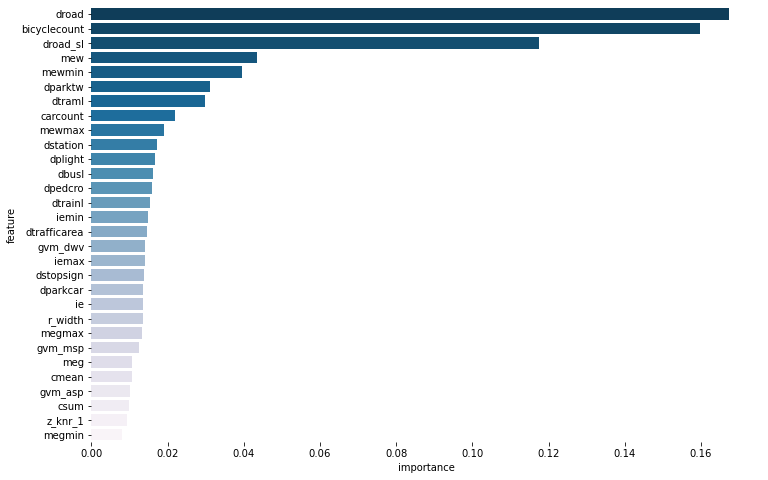

In [353]:
feature_name = list(x0.columns.values.tolist())
importances = rfc.feature_importances_
df_rfc = pd.DataFrame({'features':feature_name, 'importances':importances})
df_rfc.sort_values(by = ['importances'], ascending = False, inplace = True)
# df_rfct = df_rfc
df_rfct = df_rfc.nlargest(30, 'importances')
plt.figure(figsize = [12,8])
sn.barplot(x = df_rfct['importances'], y = df_rfct['features'],palette = "PuBu_r")
plt.xlabel('importance')
plt.ylabel('feature')
plt.box(False)
plt.savefig('svp_rf_importance_0.png')

In [354]:
print(df_rfc['features'].tolist())

['droad', 'bicyclecount', 'droad_sl', 'mew', 'mewmin', 'dparktw', 'dtraml', 'carcount', 'mewmax', 'dstation', 'dplight', 'dbusl', 'dpedcro', 'dtrainl', 'iemin', 'dtrafficarea', 'gvm_dwv', 'iemax', 'dstopsign', 'dparkcar', 'ie', 'r_width', 'megmax', 'gvm_msp', 'meg', 'cmean', 'gvm_asp', 'csum', 'z_knr_1', 'megmin', 'z_knr_5', 'trafficarea_2', 'cmax', 'speedlimit', 'speedlimit_3', 'r_width_5', 'cp', 'z_knr_6', 'z_qnr_13', 'z_qnr_9', 'z_qnr_16', 'trafficarea_1', 'z_knr_10', 'z_qnr_6', 'speedlimit_4', 'z_qnr_28', 'speedlimit_1', 'z_qnr_2', 'z_knr_7', 'z_knr_3', 'z_qnr_29', 'z_qnr_4', 'z_qnr_11', 'z_knr_8', 'r_width_4', 'z_qnr_15', 'z_qnr_5', 'z_qnr_20', 'r_width_1', 'z_knr_4', 'z_knr_11', 'z_qnr_7', 'z_qnr_12', 'z_qnr_30', 'r_width_3', 'speedlimit_6', 'r_width_2', 'z_knr_9', 'z_qnr_19', 'z_qnr_18', 'z_qnr_8', 'z_qnr_26', 'z_qnr_3', 'z_qnr_17', 'z_qnr_32', 'z_qnr_24', 'z_qnr_21', 'z_qnr_25', 'z_qnr_23', 'z_knr_2', 'r_width_6', 'z_qnr_1', 'speedlimit_2', 'z_qnr_10', 'z_qnr_22', 'z_qnr_27', '

In [355]:
# With cnvif

In [356]:
y = dfacrpv['acp']
x = dfacrpv[cnvif] 
print(len(cnvif))

60


Train data accuracy: 1.0
Test data accuracy: 0.9418960244648318
accuracy 0.9418960244648318
precision [0.93359375 0.97183099]
sensitivity recall [0.99170124 0.80232558]
f1 score [0.96177062 0.87898089]
mcc score 0.8478983013485538
kappa 0.8412093950468986


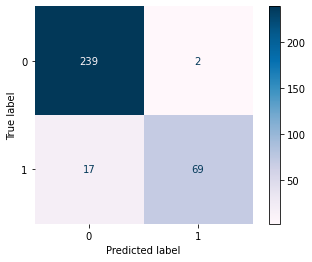

In [357]:

X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.3, 
                                                    random_state = 7)
rfc = RandomForestClassifier(n_estimators=30, max_depth=20, 
                              random_state = 7) # 6 because of following codes to find the best number of trees
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = rfc.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred_rfc))
confusion_matrix_rfc = metrics.confusion_matrix(y_test, y_pred_rfc)
cm_display_rfc = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rfc)
cm_display_rfc.plot(cmap = 'PuBu')
plt.box(False)
acc_rfc = metrics.accuracy_score(y_test, y_pred_rfc)
print('accuracy', acc_rfc)
pre_rfc = metrics.precision_score(y_test, y_pred_rfc, average = None)
print('precision', pre_rfc)
senrec_rfc = metrics.recall_score(y_test, y_pred_rfc, average = None)
print('sensitivity recall', senrec_rfc)
f1_rfc = metrics.f1_score(y_test, y_pred_rfc, average = None)
print('f1 score', f1_rfc)
mcc_rfc = metrics.matthews_corrcoef(y_test, y_pred_rfc)
print('mcc score', mcc_rfc)
ka_rfc= metrics.cohen_kappa_score(y_test, y_pred_rfc)
print('kappa', ka_rfc)

E:\Anaconda\Anaconda_file\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
E:\Anaconda\Anaconda_file\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
E:\Anaconda\Anaconda_file\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
E:\Anaconda\Anaconda_file\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
E:\Anaconda\Anaconda_file\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
E:\Anaconda\Anaconda_file\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClass

Text(0, 0.5, 'accuracy')

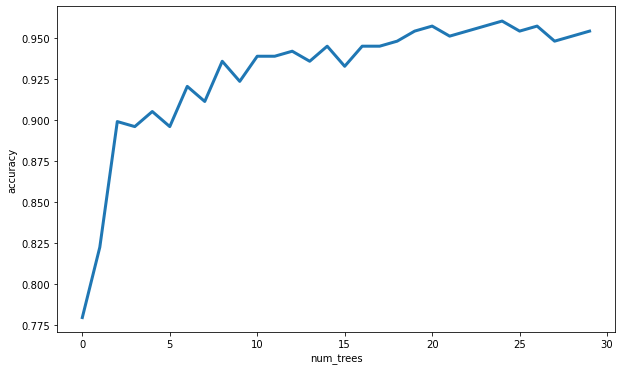

In [342]:
# Finding the best number of estimator
rf = RandomForestClassifier(n_estimators=30, max_depth=20, n_jobs=-1)
rf.fit(X_train, y_train)
predictions = []
for tree in rf.estimators_:
    predictions.append(tree.predict_proba(X_test)[None, :])
predictions = np.vstack(predictions)
cum_mean = np.cumsum(predictions, axis=0)/np.arange(1, predictions.shape[0] + 1)[:, None, None]
scores = []
for pred in cum_mean:
    scores.append(accuracy_score(y_test, np.argmax(pred, axis=1)))
plt.figure(figsize=(10, 6))
plt.plot(scores, linewidth=3)
plt.xlabel('num_trees')
plt.ylabel('accuracy')
# best n_estimator 25

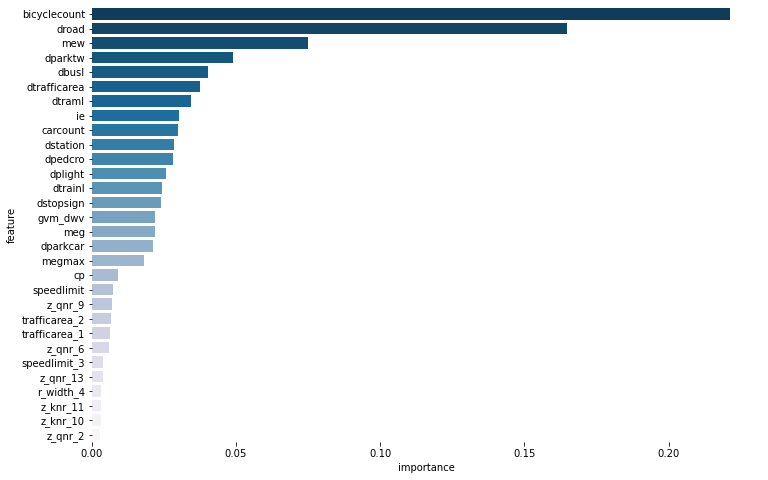

In [358]:
feature_name = list(x.columns.values.tolist())
importances = rfc.feature_importances_
df_rfc = pd.DataFrame({'features':feature_name, 'importances':importances})
df_rfc.sort_values(by = ['importances'], ascending = False, inplace = True)
df_rfct = df_rfc.nlargest(30, 'importances')
plt.figure(figsize = [12,8])
sn.barplot(x = df_rfct['importances'], y = df_rfct['features'],palette = "PuBu_r")
plt.xlabel('importance')
plt.ylabel('feature')
plt.box(False)
plt.savefig('svp_rf_importance_1.png')

In [359]:
print(df_rfc['features'].tolist())

['bicyclecount', 'droad', 'mew', 'dparktw', 'dbusl', 'dtrafficarea', 'dtraml', 'ie', 'carcount', 'dstation', 'dpedcro', 'dplight', 'dtrainl', 'dstopsign', 'gvm_dwv', 'meg', 'dparkcar', 'megmax', 'cp', 'speedlimit', 'z_qnr_9', 'trafficarea_2', 'trafficarea_1', 'z_qnr_6', 'speedlimit_3', 'z_qnr_13', 'r_width_4', 'z_knr_11', 'z_knr_10', 'z_qnr_2', 'r_width_1', 'z_qnr_11', 'r_width_5', 'z_knr_3', 'z_qnr_12', 'z_knr_2', 'z_qnr_3', 'r_width_3', 'z_qnr_22', 'z_knr_7', 'z_qnr_4', 'z_qnr_26', 'z_qnr_28', 'z_qnr_25', 'r_width_6', 'z_qnr_1', 'z_qnr_24', 'z_knr_9', 'speedlimit_6', 'z_qnr_17', 'z_qnr_21', 'z_qnr_31', 'z_qnr_32', 'z_qnr_23', 'z_qnr_14', 'cmin', 'z_qnr_33', 'speedlimit_2', 'speedlimit_5', 'z_qnr_7']


In [360]:
# Another set with both 'cp', 'cmean'
# (cnvif + 'cp', 'cmean')

In [365]:
y = dfacrpv['acp']
x = dfacrpv[cnvifnew] 

print(len(cnvifnew))

X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.3, 
                                                    random_state = 7)

61


Train data accuracy: 1.0
Test data accuracy: 0.9480122324159022
accuracy 0.9480122324159022
precision [0.948      0.94805195]
sensitivity recall [0.98340249 0.84883721]
f1 score [0.96537678 0.89570552]
mcc score 0.863556601197276
kappa 0.8612227575704621


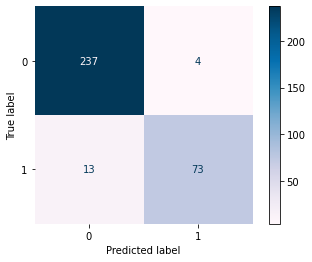

In [368]:
rfc = RandomForestClassifier(n_estimators=20, max_depth=20, 
                              random_state = 7) 
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = rfc.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred_rfc))
confusion_matrix_rfc = metrics.confusion_matrix(y_test, y_pred_rfc)
cm_display_rfc = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rfc)
cm_display_rfc.plot(cmap = 'PuBu')
plt.box(False)
acc_rfc = metrics.accuracy_score(y_test, y_pred_rfc)
print('accuracy', acc_rfc)
pre_rfc = metrics.precision_score(y_test, y_pred_rfc, average = None)
print('precision', pre_rfc)
senrec_rfc = metrics.recall_score(y_test, y_pred_rfc, average = None)
print('sensitivity recall', senrec_rfc)
f1_rfc = metrics.f1_score(y_test, y_pred_rfc, average = None)
print('f1 score', f1_rfc)
mcc_rfc = metrics.matthews_corrcoef(y_test, y_pred_rfc)
print('mcc score', mcc_rfc)
ka_rfc= metrics.cohen_kappa_score(y_test, y_pred_rfc)
print('kappa', ka_rfc)

E:\Anaconda\Anaconda_file\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
E:\Anaconda\Anaconda_file\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
E:\Anaconda\Anaconda_file\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
E:\Anaconda\Anaconda_file\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
E:\Anaconda\Anaconda_file\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
E:\Anaconda\Anaconda_file\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClass

Text(0, 0.5, 'accuracy')

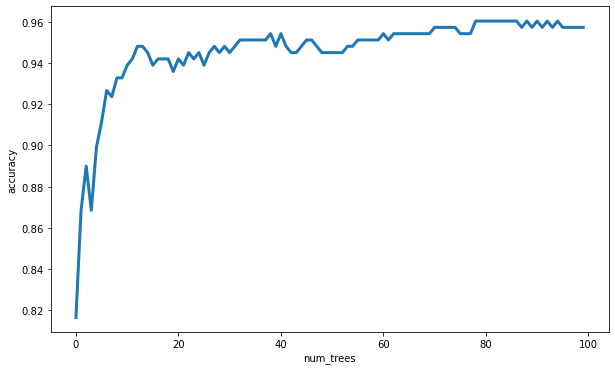

In [367]:
# Finding the best number of estimator
rf = RandomForestClassifier(n_estimators=100, max_depth=20, n_jobs=-1)
rf.fit(X_train, y_train)
predictions = []
for tree in rf.estimators_:
    predictions.append(tree.predict_proba(X_test)[None, :])
predictions = np.vstack(predictions)
cum_mean = np.cumsum(predictions, axis=0)/np.arange(1, predictions.shape[0] + 1)[:, None, None]
scores = []
for pred in cum_mean:
    scores.append(accuracy_score(y_test, np.argmax(pred, axis=1)))
plt.figure(figsize=(10, 6))
plt.plot(scores, linewidth=3)
plt.xlabel('num_trees')
plt.ylabel('accuracy')
# best n_estimator 20

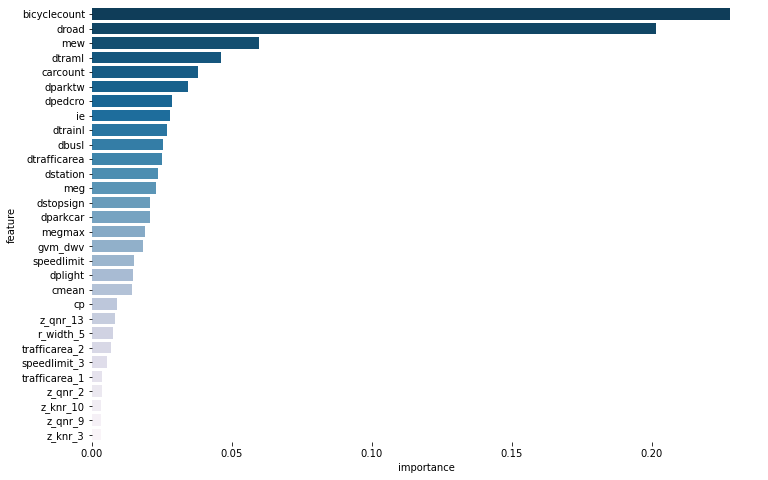

In [369]:
feature_name = list(x.columns.values.tolist())
importances = rfc.feature_importances_
df_rfc = pd.DataFrame({'features':feature_name, 'importances':importances})
df_rfc.sort_values(by = ['importances'], ascending = False, inplace = True)
df_rfct = df_rfc.nlargest(30, 'importances')
plt.figure(figsize = [12,8])
sn.barplot(x = df_rfct['importances'], y = df_rfct['features'],palette = "PuBu_r")
plt.xlabel('importance')
plt.ylabel('feature')
plt.box(False)
plt.savefig('svp_rf_importance_2.png')